In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]

])

df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [11]:
#Step 2: Standardization using pandas (avoids NaN issues)
standardized_data = (df - df.mean()) / df.std()


In [4]:
#Step 3: Covariance matrix
cov_matrix = np.cov(standardized_data.T)



In [5]:
#Step 4: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [22]:
#Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]


In [23]:
#Step 6: Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]

In [24]:
#Step 7: Project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [25]:
#Step 8: Output the reduced data
print("\nReduced Data (after PCA): \n", reduced_df)


Reduced Data (after PCA): 
         PC1       PC2
0  0.912245  0.280295
1 -2.833210 -0.150122
2  1.293138 -0.460307
3  0.215152 -0.142057
4  2.379437  0.237183
5  1.345260 -0.271091
6 -0.381194  0.464403
7 -2.066608  0.034793
8 -0.864220  0.006903


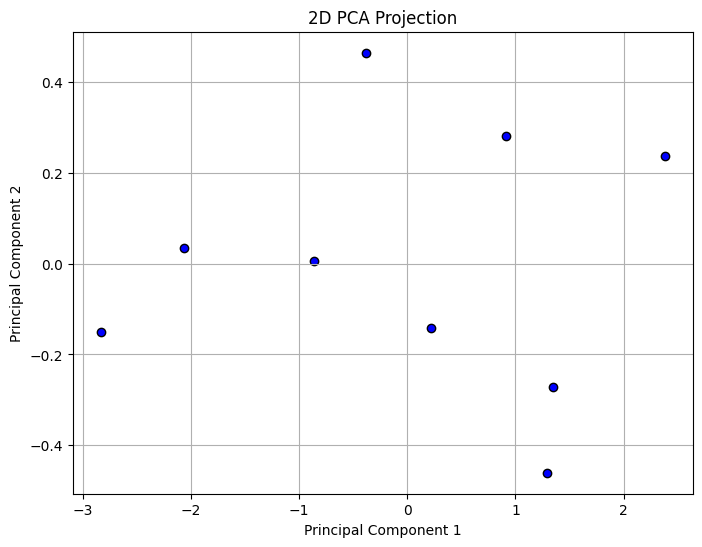

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()